In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv['data'].shape, oliv['images'].shape, oliv['target'].shape

((400, 4096), (400, 64, 64), (400,))

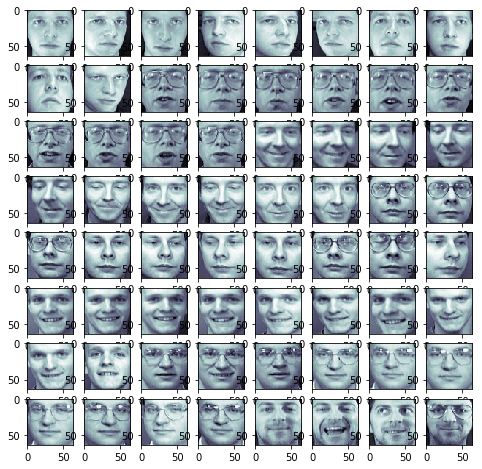

In [5]:
fig = plt.figure(figsize= (8, 8))
# plot 64 images
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [6]:
x = oliv.data
y = oliv.target

In [7]:
pca = PCA()
pca.fit(x)
# since number of images is less than the number of features, so we have 400 components with 4096 features each
pca.components_.shape  

(400, 4096)

In [8]:
# finding optimal value of k
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum / total < 0.95:
    current_sum += pca.explained_variance_[k]
    k = k + 1
k

123

In [9]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(x)

In [10]:
# reproducing images
x_approx = pca.inverse_transform(transformed_data)
x_approx_images = x_approx.reshape((400, 64, 64))

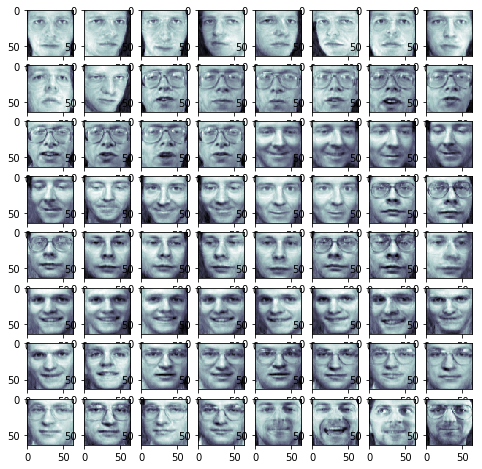

In [11]:
fig = plt.figure(figsize= (8, 8))
# plot 64 images
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()

# Eigenfaces

In [12]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [13]:
eigenfaces = eigenv.reshape((123, 64, 64))

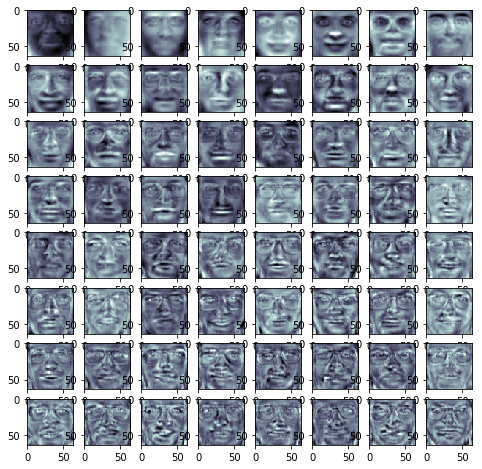

In [14]:
fig = plt.figure(figsize= (8, 8))
# plot 64 images
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenfaces[i], cmap=plt.cm.bone)
plt.show()